 ## WE RATE DOGS DATA WRANGLING AND VISUALIZATION


### Project Objectives


1. Gathering Data
2. Assessing Data
3.  Cleaning Data
4. Analysis and Visualization

In [1]:
#!pip install tweepy

In [2]:
#Libraries to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import datetime as dt
import os
import requests
import tweepy

## Step 1
## Gather Data

#### The WeRateDogs Twitter archive DATASET

In [3]:
#read data
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
twitter_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


##### The tweet image prediction

In [5]:
# Make directory if it doesn't already exist
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [6]:
#Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#create  the file using write byte
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
#Import the tweet image predictions TSV file into a DataFrame
image_prediction = pd.read_csv('image_predictions.tsv', sep='\t')



In [7]:
image_prediction.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### Data from the Twitter Api

### I downloaded the json txt file.

In [8]:
# For loop which will add each available tweet to a new line of tweet-json.txt
with open('tweet-json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue

In [9]:
 twitter_list = []

# Read the .txt file line by line into a list of dictionaries
for line in open('tweet-json.txt', 'r'):
    twitter_data = json.loads(line)
    twitter_list.append({'tweet_id': twitter_data['id_str'],
                        'retweet_count': twitter_data['retweet_count'],
                        'favorite_count': twitter_data['favorite_count'],
                        'followers_count': twitter_data['user']['followers_count']})

In [10]:
# Convert the list of dictionaries to a pandas DataFrame
twitter_data = pd.DataFrame(twitter_list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'followers_count'])

In [11]:
#read the twitter data
twitter_data.head(3)

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889


## Step 2 Accessing Data

In [12]:
###twitter data

twitter_data.head()

,tweet_id,retweet_count,favorite_count,followers_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [13]:
#To see the summary
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   retweet_count    2354 non-null   int64 
 2   favorite_count   2354 non-null   int64 
 3   followers_count  2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [14]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
image_prediction.duplicated().sum()

0

In [17]:
# What is a range of p1_conf values? They should be between 0 and 1.
image_prediction.p1_conf.describe()

count    2075.000000
mean        0.594548
std         0.271174
min         0.044333
25%         0.364412
50%         0.588230
75%         0.843855
max         1.000000
Name: p1_conf, dtype: float64

In [18]:
image_prediction.p2_conf.describe()

count    2.075000e+03
mean     1.345886e-01
std      1.006657e-01
min      1.011300e-08
25%      5.388625e-02
50%      1.181810e-01
75%      1.955655e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [19]:
image_prediction.p3_conf.describe()

count    2.075000e+03
mean     6.032417e-02
std      5.090593e-02
min      1.740170e-10
25%      1.622240e-02
50%      4.944380e-02
75%      9.180755e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

In [20]:
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [21]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [22]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Anthony      1
Ole          1
Mookie       1
Dug          1
Lambeau      1
Name: name, Length: 957, dtype: int64

In [23]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
502,813081950185472002,NaN,NaN,2016-12-25 18:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Baron. He's officially festive as h*ck...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/813081950...,11,10,Baron,None,None,None,None
905,758099635764359168,NaN,NaN,2016-07-27 00:40:12 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",In case you haven't seen the most dramatic sne...,NaN,NaN,NaN,https://vine.co/v/hQJbaj1VpIz,13,10,None,None,None,None,None
307,835685285446955009,NaN,NaN,2017-02-26 02:57:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rory. He's got an inter...,7.869631e+17,4.196984e+09,2016-10-14 16:13:10 +0000,https://twitter.com/dog_rates/status/786963064...,12,10,Rory,None,None,None,None
1502,692041934689402880,NaN,NaN,2016-01-26 17:50:29 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Teddy. His head is too heavy. 13/10 (v...,NaN,NaN,NaN,https://vine.co/v/iiI3wmqXYmA,13,10,Teddy,None,None,None,None
1346,704480331685040129,NaN,NaN,2016-03-01 01:36:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lucia. She's a Cumulonimbus Floofmallow. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704480331...,11,10,Lucia,None,None,None,None


In [24]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Anthony      1
Ole          1
Mookie       1
Dug          1
Lambeau      1
Name: name, Length: 957, dtype: int64

## Observations
The following observations were made using visual (manual review in Excel) and programmatic (pandas) assessment.



## Quality
   ###### Twitter Archive
   
   1. timestamp is string and should be datetime
   2. name more than 745 records do not contain a valid name, all names should start with a capital letter.
   3. Keep original ratings (no retweets) that have images 
   4. Drop columns that is  not needed for our analysis
   5. doggo, floofer, pupper, puppo columns contain 'None' value.  NaN should be used not None.
   6. name more than 745 records do not contain a valid name, all names should start with a capital letter
   7. Erroneous datatypes in these columns (tweet_id, rating_denominator,rating_numerator, in_reply_to_status_id,            in_reply_to_user_id, timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp,            doggo,      floofer, pupper, and puppo)
   8. Error in dog names (e.g a,an,actually) are not a dog's name.
   9. Source column is in HTML-formatted string in the source column, not a normal string
   
###### Image Prediction
   10. p1, p2, and p3 are inconsistent in a way capital and small letters are used in values.
   11. Erroneous datatype (tweet_id)
   12. Missing images (only 2075 counts out of possible 2356)
   
###### Twitter Data Api
   13. Erroneous datatype (tweet_id)
   14. Missing tweets
   
   

   

      


## Tidiness

###### Twitter Archive
 1. There are retweets and replies included in the dataset (represented by redundant columns)
 2. doggo, floofer, pupper, puppo columns are all about the same things, a kind of dog personality.
 
###### Image Prediction
 3. Image predictions table should be added to twitter archive table
 
###### Twitter Data Api
 4. Twitter data api columns(retweet_count, favorite_count, followers_count) should be added to twitter archive table.



## Step 3: Cleaning Data

##### Create a copy of data

In [25]:
# Make copies to keep the original datasets
archive_clean = twitter_archive.copy()
image_clean = image_prediction.copy()
twitterapi_clean = twitter_data.copy()

Use only original tweets/ratings that have images.

According to one of the project's requirements, we only want original ratings that have images (no retweets nor replies).



In [26]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Define

Remove tweets that are a replay or a retweet



#### Code

In [27]:
#Delete retweets by filtering the NaN of retweeted_status_user_id
archive_clean = archive_clean[pd.isnull(archive_clean['retweeted_status_user_id'])]

#### Test

In [28]:
#confirm changes
print(sum(archive_clean.retweeted_status_user_id.value_counts()))

0


### Define


Remove not needed columns:

in_reply_to_status_id,

in_reply_to_user_id,

retweeted_status_id,

retweeted_status_user_id,

retweeted_status_timestamp.
img-num

In [29]:
archive_clean.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp','expanded_urls'], axis=1, inplace=True)

# Remove img_num column
image_clean.drop(['img_num'], axis=1, inplace=True)

#Test

In [30]:
# After columns are removed
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   rating_numerator    2175 non-null   int64 
 5   rating_denominator  2175 non-null   int64 
 6   name                2175 non-null   object
 7   doggo               2175 non-null   object
 8   floofer             2175 non-null   object
 9   pupper              2175 non-null   object
 10  puppo               2175 non-null   object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


### Define
Erroneous datatype fix

#### Code

In [31]:
# Convert tweet_id to str from twitter_archive, image_prediction, twitter_data tables.
archive_clean.tweet_id = archive_clean.tweet_id.astype(str)
image_clean.tweet_id = image_clean.tweet_id.astype(str)
twitterapi_clean.tweet_id = archive_clean.tweet_id.astype(str)

# convert timestamp to datetime
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

# convert source to category datatype
archive_clean.source = archive_clean.source.astype("category")

### Test

In [32]:

#confirm changes
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   doggo               2175 non-null   object             
 8   floofer             2175 non-null   object             
 9   pupper              2175 non-null   object             
 10  puppo               2175 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(7)
memory usage: 253.8+ KB


In [33]:
archive_clean.tail(15)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2341,666094000022159362,2015-11-16 03:22:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,9,10,None,None,None,None,None
2342,666082916733198337,2015-11-16 02:38:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,6,10,None,None,None,None,None
2343,666073100786774016,2015-11-16 01:59:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,10,10,None,None,None,None,None
2344,666071193221509120,2015-11-16 01:52:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,9,10,None,None,None,None,None
2345,666063827256086533,2015-11-16 01:22:45+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,10,10,the,None,None,None,None
2346,666058600524156928,2015-11-16 01:01:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,8,10,the,None,None,None,None
2347,666057090499244032,2015-11-16 00:55:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,9,10,a,None,None,None,None
2348,666055525042405380,2015-11-16 00:49:46+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,10,10,a,None,None,None,None
2349,666051853826850816,2015-11-16 00:35:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,2,10,an,None,None,None,None
2350,666050758794694657,2015-11-16 00:30:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,10,10,a,None,None,None,None



Handle invalid values

### Define

In archive_clean:

1. In name change 'None' to NaN.
2. In doggo, floofer, pupper, puppo change 'None' to NaN.

In df_pred_clean:

3. Capitalize the first letter of all items in p1, p2, and p3 columns.


#### Code

In [34]:

# Capitalize first letters
image_clean['p1'] = [item.capitalize() for item in image_clean['p1']]
image_clean['p2'] = [item.capitalize() for item in image_clean['p2']]
image_clean['p3'] = [item.capitalize() for item in image_clean['p3']]

In [35]:
# Function to change None to NaN

def change_to_null(item):
    if item == 'None':
        item = np.NaN
    return item


#changing to Nan
archive_clean['doggo'] = [change_to_null(item) for item in archive_clean['doggo']]
archive_clean['floofer'] = [change_to_null(item) for item in archive_clean['floofer']]
archive_clean['pupper'] = [change_to_null(item) for item in archive_clean['pupper']]
archive_clean['puppo'] = [change_to_null(item) for item in archive_clean['puppo']]

### Test

In [36]:
# Check first letter capitalization
archive_clean['name'].sample(10)
#image_clean['p1'].sample(20)

2276       None
2194    Ruffles
806       Penny
1880     Mollie
936        Hank
1614    Petrick
1165       None
1431      Pherb
2280       Fwed
196      Marlee
Name: name, dtype: object

### Define

Incorrect dog names.
We have names like a , an and awhich are not really dog names. 

Capitalize the first letter of all names in name.

I'II be using regrex to remove it

Drop unused columns


In [37]:
archive_clean['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [38]:
#to  remove the incorecet name
archive_clean['name'][archive_clean['name'].str.match('[a-z]+')] = 'None'

<ipython-input-38-821269872973>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  archive_clean['name'][archive_clean['name'].str.match('[a-z]+')] = 'None'


In [39]:
# Capitalize first letters
archive_clean['name'] = [name.capitalize() for name in archive_clean['name']]

In [40]:
#To change None to Nan
#archive_clean['name'] = [change_to_null(item) for item in archive_clean['name']]

In [41]:
# drop columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

#### Test

In [42]:
#confirm changes
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   category           
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
dtypes: category(1), datetime64[ns, UTC](1), int64(2), object(3)
memory usage: 185.8+ KB


### Define

Source column is in HTML-formatted string, not a normal string https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.htmlhttps://stackoverflow.com/questions/13682044/remove-unwanted-parts-from-strings-in-a-column?noredirect=1

#### Code

In [43]:
#extract values
archive_clean['source'] = archive_clean['source'].str.extract('>([\w\W\s]*)<', expand=True)

In [44]:
#confirm changes
archive_clean.source.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Define 


To Create a rating column, we have to divide the numerator /denomantor

#### Code

In [45]:
# Create the rating column
#archive_clean['rating'] = archive_clean['rating_numerator'] / archive_clean['rating_denominator']

#### Test


In [46]:
#archive_clean.info()

In [47]:
#rchive_clean.rating.describe()

### Tidiness

###Define
 
Lets merge twitter api clean dataframe  and image prediction  into twitter archive table.

#### Code
 

In [48]:
#merge the two df
archive_clean = pd.merge(left=archive_clean, right=twitterapi_clean, how='left', on='tweet_id')
archive_clean = pd.merge(left=archive_clean, right=image_clean, how='left', on='tweet_id')

In [49]:
# confirm changes
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   source              2175 non-null   object             
 3   text                2175 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   name                2175 non-null   object             
 7   retweet_count       2173 non-null   float64            
 8   favorite_count      2173 non-null   float64            
 9   followers_count     2173 non-null   float64            
 10  jpg_url             1994 non-null   object             
 11  p1                  1994 non-null   object             
 12  p1_conf             1994 non-null 

#### Define

Let's drop tweets with no images

#### Code

In [50]:
 # drop rows with no image
archive_clean.dropna(axis = 0, inplace=True)

###### Test

In [51]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2172
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1992 non-null   object             
 1   timestamp           1992 non-null   datetime64[ns, UTC]
 2   source              1992 non-null   object             
 3   text                1992 non-null   object             
 4   rating_numerator    1992 non-null   int64              
 5   rating_denominator  1992 non-null   int64              
 6   name                1992 non-null   object             
 7   retweet_count       1992 non-null   float64            
 8   favorite_count      1992 non-null   float64            
 9   followers_count     1992 non-null   float64            
 10  jpg_url             1992 non-null   object             
 11  p1                  1992 non-null   object             
 12  p1_conf             1992 non-null 

### Saved Cleaned Data

In [52]:
#To save to csv
archive_clean.to_csv('twitter_archive_master.csv', index=False)

### Step 4

### Analysis and Visualization

In [53]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 2172
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1992 non-null   object             
 1   timestamp           1992 non-null   datetime64[ns, UTC]
 2   source              1992 non-null   object             
 3   text                1992 non-null   object             
 4   rating_numerator    1992 non-null   int64              
 5   rating_denominator  1992 non-null   int64              
 6   name                1992 non-null   object             
 7   retweet_count       1992 non-null   float64            
 8   favorite_count      1992 non-null   float64            
 9   followers_count     1992 non-null   float64            
 10  jpg_url             1992 non-null   object             
 11  p1                  1992 non-null   object             
 12  p1_conf             1992 non-null 

In [54]:
##read the df
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [55]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1992 non-null   int64  
 1   timestamp           1992 non-null   object 
 2   source              1992 non-null   object 
 3   text                1992 non-null   object 
 4   rating_numerator    1992 non-null   int64  
 5   rating_denominator  1992 non-null   int64  
 6   name                1992 non-null   object 
 7   retweet_count       1992 non-null   float64
 8   favorite_count      1992 non-null   float64
 9   followers_count     1992 non-null   float64
 10  jpg_url             1992 non-null   object 
 11  p1                  1992 non-null   object 
 12  p1_conf             1992 non-null   float64
 13  p1_dog              1992 non-null   bool   
 14  p2                  1992 non-null   object 
 15  p2_conf             1992 non-null   float64
 16  p2_dog

#####  We have to change the types 


In [56]:
# Change types
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)
twitter_archive_master[['rating_numerator', 'rating_denominator']] = twitter_archive_master[['rating_numerator', 'rating_denominator']].astype(float)
twitter_archive_master[['retweet_count', 'favorite_count', 'followers_count']] = twitter_archive_master[['retweet_count', 'favorite_count', 'followers_count']].astype(int)
twitter_archive_master.source = twitter_archive_master.source.astype("category")
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)

In [57]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992 entries, 0 to 1991
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1992 non-null   object             
 1   timestamp           1992 non-null   datetime64[ns, UTC]
 2   source              1992 non-null   category           
 3   text                1992 non-null   object             
 4   rating_numerator    1992 non-null   float64            
 5   rating_denominator  1992 non-null   float64            
 6   name                1992 non-null   object             
 7   retweet_count       1992 non-null   int64              
 8   favorite_count      1992 non-null   int64              
 9   followers_count     1992 non-null   int64              
 10  jpg_url             1992 non-null   object             
 11  p1                  1992 non-null   object             
 12  p1_conf             1992 non-null 


#### Most common 10 dogs' name

In [58]:
top_names = twitter_archive_master.name.value_counts()[1:10]
top_names


Charlie    11
Lucy       10
Cooper     10
Oliver     10
Penny       9
Tucker      9
Sadie       8
Winston     8
Lola        7
Name: name, dtype: int64

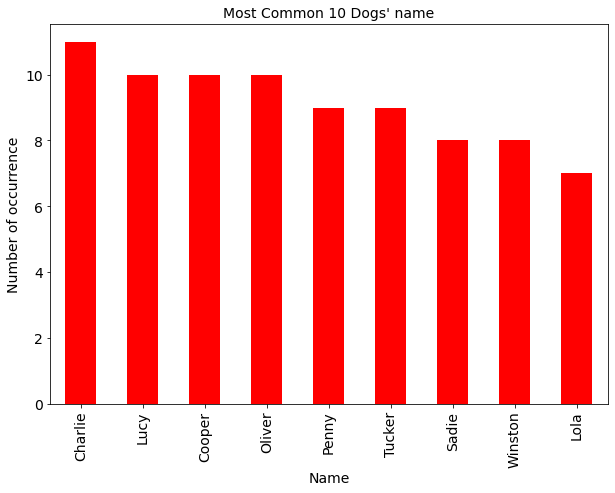

In [59]:
#plot
t_bar = top_names.plot.bar(color = 'red', fontsize = 14)

#figure size(width, height)
t_bar.figure.set_size_inches(10, 7);

#Add labels
plt.title("Most Common 10 Dogs' name", color = 'black', fontsize = '14')
plt.xlabel('Name', color = 'black', fontsize = '14')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '14');

 ### Is there a correlation between Favorite and Retweet ?

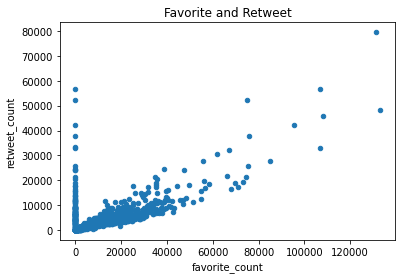

In [60]:
# Correlation between profit and budget
twitter_archive_master.plot(x='favorite_count', y='retweet_count', kind='scatter', title = 'Favorite and Retweet');

In [61]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'])

0.7120771236949

 #####  The above scatter plot shows there is a positive correlation between favorite and Retweet.

 #### The  Twitter Source that was used most by the users.

In [62]:
twitter_source = twitter_archive_master['source'].value_counts()
twitter_source

Twitter for iPhone    1953
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

Text(0, 0.5, 'Number of tweets')

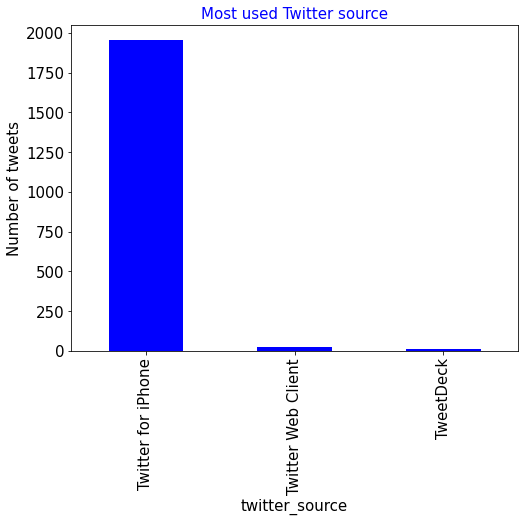

In [63]:
##plot
t_bar = twitter_source.plot.bar(color = 'blue', fontsize = 15)

#figure size(width, height)
t_bar.figure.set_size_inches(8, 6);

#Add labels
plt.title('Most used Twitter source', color = 'blue', fontsize = '15')
plt.xlabel('twitter_source', color = 'black', fontsize = '15')
plt.ylabel('Number of tweets', color = 'black', fontsize = '15')

### Tweets creation over time

In [65]:
# Create a date column out of timetamp   
twitter_archive_master['date'] = twitter_archive_master['timestamp'].dt.date

In [66]:
# Add  date, rewteets and favorites to  froma a seprate dataframe to check the comaparison over time 
df = twitter_archive_master[['date', 'retweet_count', 'favorite_count']]

# Retweets
# retweet couht of time 
df1 = df[['date', 'retweet_count']].groupby(['date']).sum()

# i love to use  moving averages to smooth the line
#using moving average line 
df1['retweet_count'] = df1['retweet_count'].rolling(window=20).mean()


# Favorites
# favourite count of time 
df2 = df[['date', 'favorite_count']].groupby(['date']).sum()
#using moving average 
df2['favorite_count'] = df2['favorite_count'].rolling(window=20).mean()


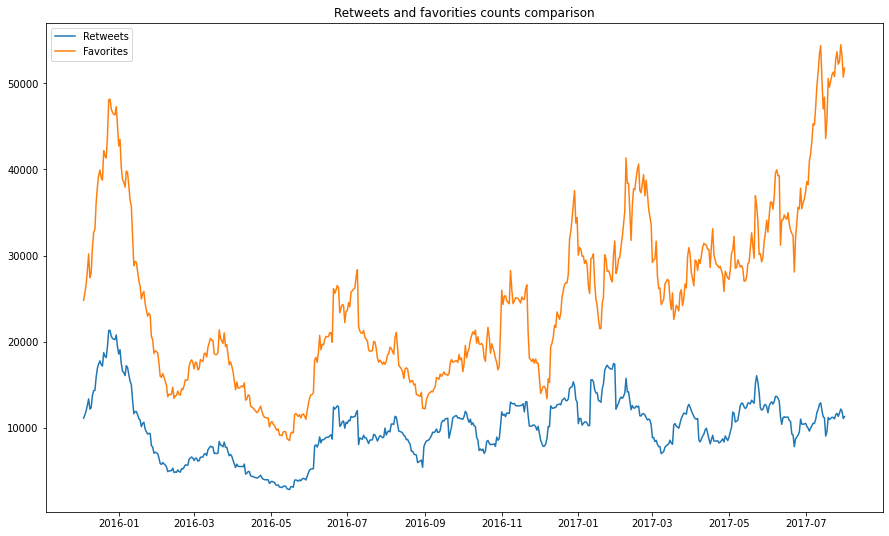

In [67]:
# Compare trends on a log scale for y axis
fig, axs = plt.subplots(1, 1, sharex=True, sharey=False, figsize=(15,9))

axs.set_title('Retweets and favorities counts comparison')
#axs.set_yscale('log')
axs.plot(df1, label='Retweets')
axs.plot(df2, label='Favorites')
axs.legend()

plt.show()

From the chart , we can see there is notable variety in retweets, but they tend to stay at the same level over time.
While for Favorites  the tendency is rising after an initial surge and then decline. It appears that users continue to like past tweets, or that the user base is growing, resulting in an increasing number of favorites.

#### References

1.  https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_pickle.html
2. https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
3. https://docs.python.org/3/library/json.html#json.loads
4. https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/user-object
5. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extract.html
6. https://media.readthedocs.org/pdf/tweepy/latest/tweepy.pdf